In [26]:
import pandas as pd
import plotly.express as px
# So this isn't stratified
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [27]:
stroke_df = pd.read_csv("./Data/healthcare-dataset-stroke-data.csv")

# https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [28]:
stroke_df.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [29]:
stroke_df.isnull()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


In [30]:
stroke_df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [31]:
stroke_df.duplicated().value_counts()

False    5110
dtype: int64

In [32]:
stroke_df = stroke_df.dropna(axis=0)

In [33]:
stroke_df.gender.value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

In [34]:
print(stroke_df.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [35]:
# This is how many (rows, columns) there are
stroke_df.shape

(4909, 12)

In [36]:
clean_stroke_df = pd.get_dummies(stroke_df, columns=['gender','ever_married','work_type','Residence_type','smoking_status']) #Other columns here
clean_stroke_df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
2,31112,80.0,0,1,105.92,32.5,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
5,56669,81.0,0,0,186.21,29.0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0


In [37]:
clean_stroke_df = clean_stroke_df.drop(['id'], axis=1)
clean_stroke_df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
2,80.0,0,1,105.92,32.5,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0


In [38]:
print(clean_stroke_df.columns)

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Female', 'gender_Male', 'gender_Other',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')


In [39]:
feature_columns = list(clean_stroke_df.columns)
feature_columns.remove('stroke')
y_column = 'stroke'


In [40]:
X = clean_stroke_df[feature_columns]
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
2,80.0,0,1,105.92,32.5,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0


In [41]:
y = clean_stroke_df[y_column]
y.head()

0    1
2    1
3    1
4    1
5    1
Name: stroke, dtype: int64

In [42]:
# from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=42)

y_train.value_counts() 


0    3771
1     156
Name: stroke, dtype: int64

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=42, stratify=y)

# So I just was being silly it's not true or false you have to tell what you're stratifying on so you stratify on y and you can see that the y_train 
# Now has a 80/20 split

In [44]:
# This one is stratified
y_train.value_counts()

0    3760
1     167
Name: stroke, dtype: int64

In [45]:
y_test.value_counts()

0    940
1     42
Name: stroke, dtype: int64

Here, the Frenzied Physicists split our data on Stroke victims into X and Y, with <u>x being patient traits </u>and <u>y being if they had a stroke or not</u>. We then divided up all of our data into an 80:20 ratio., with the <u>80% being our training data</u> and the <u>20% being our testing data</u>. One challenge we faced when dividing the data was that because our percentage of stroke victims compared to non\-stroke victims was so small, we risked grouping all of our stroke victims into the testing data and creating a training dataset that consisted of mostly non\-stroke victims. To ensure that the ratio remained consistent,  we **stratified** our data. Stratifying data is like shrinking down your data size rather than cutting it. When you cut a piece of a picture to fit in in a frame, you risk losing important details. However, shrinking your picture preserves just shrinks your data, losing precise details but maintaining the general picture. 



In the following lines of code, F.P. utilized five different classifiers to train our data. We used _GridsearchCV_ for hyper\-parameter tuning, enabling us to find the best combinations of paramaters to **best** classify our data. 



Accuracy: 0.9226069246435845
Precision: 0.09523809523809523
Recall: 0.09523809523809523
F1 Score: 0.09523809523809523


/projects/4ecc52f5-f80b-4322-9a0d-563e88b9d2a6/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1620 fits failed out of a total of 14580.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1620 fits failed with the following error:
Traceback (most recent call last):
  File "/projects/4ecc52f5-f80b-4322-9a0d-563e88b9d2a6/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/projects/4ecc52f5-f80b-4322-9a0d-563e88b9d2a6/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 969, in fit
    super().fit(
  File "/projects/4ecc52f5-f80b-4322-9a0d-563e88b9d2a6/.local/lib/python3.

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 10)})

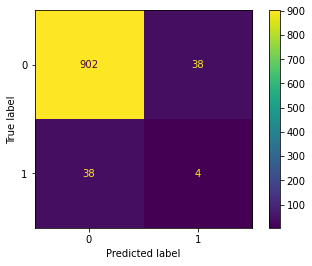

In [46]:
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

tree_clf = tree.DecisionTreeClassifier()
tree_clf = tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_tree))
print("Precision:", metrics.precision_score(y_test, y_pred_tree))
print("Recall:", metrics.recall_score(y_test, y_pred_tree))
print("F1 Score:", metrics.f1_score(y_test, y_pred_tree))
cm = confusion_matrix(y_test, y_pred_tree, labels=tree_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_clf.classes_)
disp.plot()

from sklearn.model_selection import GridSearchCV
from sklearn import svm, datasets
parameters = {'criterion' :['gini', 'entropy'],
              'max_features' :['sqrt', 'log2'],
              'max_depth' :range(1,10),
              'min_samples_split' :range(1,10),
              'min_samples_leaf' :range(1,10)} 
clf = GridSearchCV(tree_clf, parameters)
clf.fit(X_train, y_train)

A **decision tree classifier** is a form of classifier that maps differences and categories of data for the purpose of easily visualizing it. More importantly, they are able to capture decision\-making knowledge from supplied data, making this type of classifier a good fit. Important parameters include:

- <u>Criterion</u>: This feature mesaures the quality of the split, or in other words determines if the division of data is appropriate. In this model, 'gini' refers to gini impurity and entropy refers to the shannon information gain. 
- <u>Max features</u>: This refers to the strategy used to find the best split at a node. 
- <u>Max depth</u>: Setting a max depth limits the number of branches that your tree can have. This can be helpful if there are various variables and a lot of data that could result in an incoherent and unreadable tree. By setting max depths \(say four or five branches\) your tree is forced to display only th
- 
- 



In [47]:
print(clf.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 9, 'min_samples_split': 8}


In [48]:
tree_clf = tree.DecisionTreeClassifier (criterion'gini',max_depth= 6, max_features= 'sqrt', min_samples_leaf = 5, min_samples_split= 3)
tree_clf = tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
param_dict = {
    "criterion":['gini','entropy'],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,5)   
}
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_tree))
print("Precision:", metrics.precision_score(y_test, y_pred_tree))
print("Recall:", metrics.recall_score(y_test, y_pred_tree))
print("F1 Score:", metrics.f1_score(y_test, y_pred_tree))
cm = confusion_matrix(y_test, y_pred_tree, labels=tree_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_clf.classes_)
disp.plot()




SyntaxError: invalid syntax (3535954796.py, line 1)

Our second decision tree classifier is much like our first. Note that our Output is slightly different from the first dtc. Data issues still prominent.


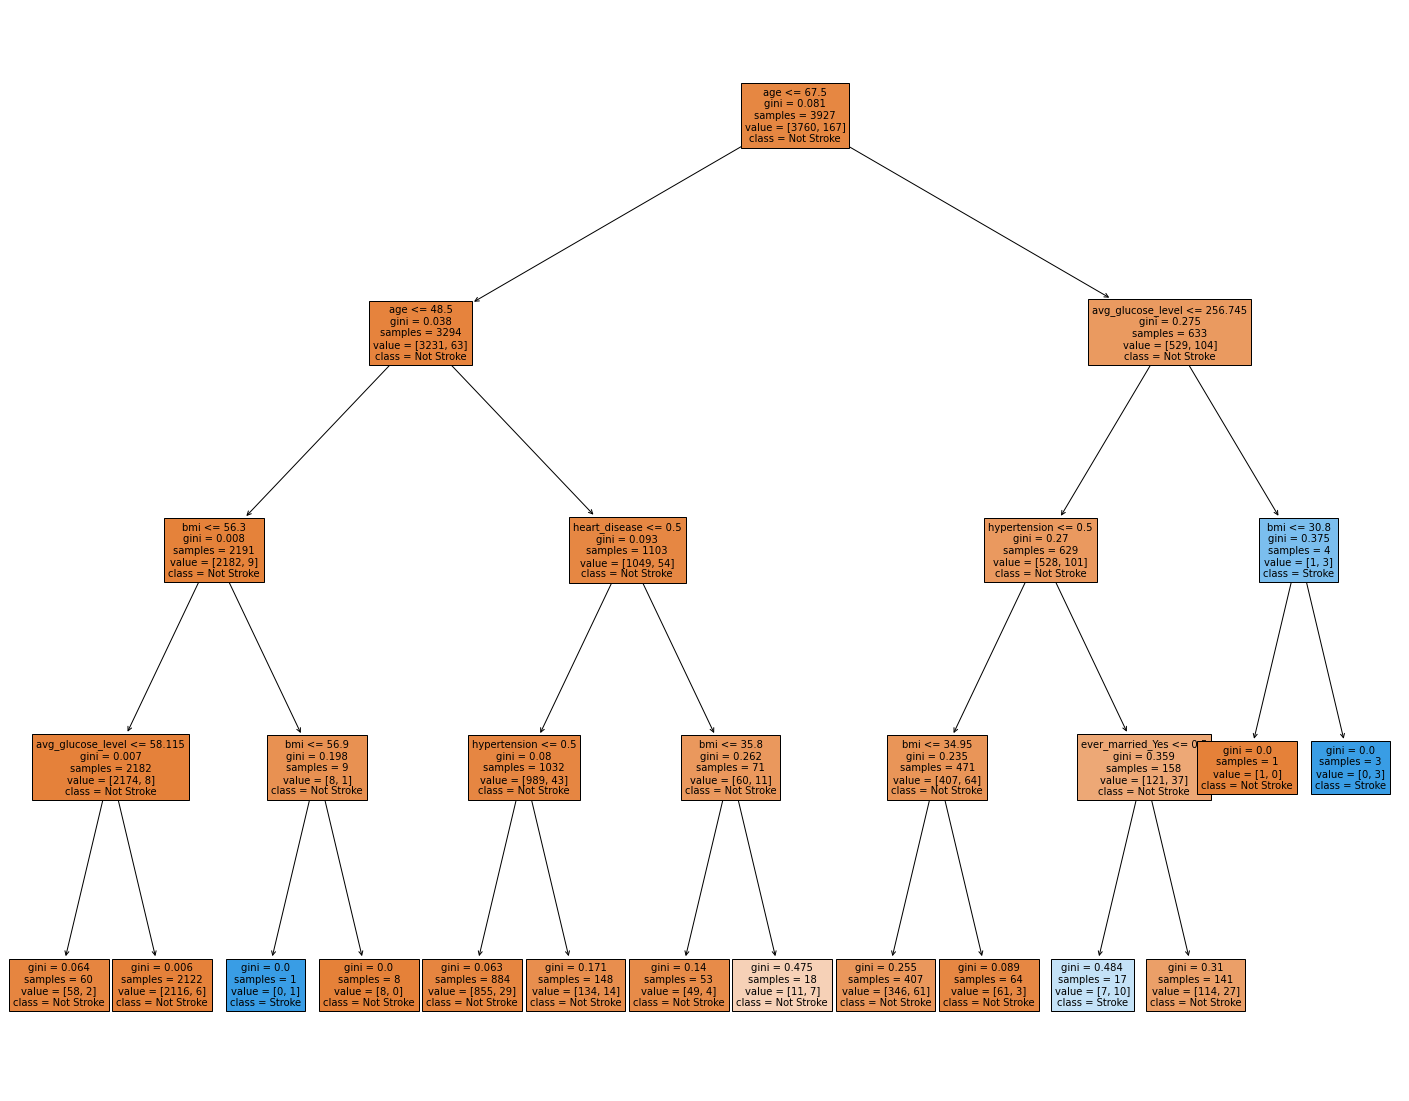

In [49]:
from matplotlib import pyplot as plt
tree_clf = tree.DecisionTreeClassifier(max_depth=4)
tree_clf = tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_clf, 
                   feature_names=feature_columns,  
                   class_names=['Not Stroke','Stroke'],
                   filled=True, fontsize=10)


This decision tree shows us what our coding from earlier described. Each of the boxes show important data like, for instance, at the to it says "age is less than or equal to 67.5" if this is true than the patient will move to the left, and if it is false it will go to the right, it will then follow this patters of "x is less than or equal to y" until we reach the bottom.  Also you can see that each of the boxes are colored orange or blue, if it is collared blue than that patient in out data had a stroke whereas if it is orange they did not have a stroke.



In [0]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
clf_rf = RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators= 200, max_depth=4, criterion='gini')
clf_rf = clf_rf.fit(X_train,y_train)
y_pred_rf = clf_rf.predict(X_test)
acc_rf = metrics.accuracy_score(y_test, y_pred_rf)
print('Testing-set Accuracy score is:', acc_rf)
#print("Precision:", metrics.precision_score(y_test, y_pred_rf))
print("Recall:", metrics.recall_score(y_test, y_pred_rf))
print("F1 Score:", metrics.f1_score(y_test, y_pred_rf))
cm = confusion_matrix(y_test, y_pred_rf, labels=tree_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_clf.classes_)
disp.plot()

By using a random forest classifier, 


SUHAS/ESMERALDA`

In [0]:
clf_rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [150, 200, 250],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [1,2,3,4,5,6,7],
    'criterion' :['gini', 'entropy']}
clf_rf_gs = GridSearchCV(clf_rf, param_grid)
clf_rf_gs.fit(X_train,y_train)

In [0]:
print(clf_rf_gs.best_params_)

In [0]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = metrics.accuracy_score(y_test,knn_pred)
print("KNN Model Acuuracy is:", acc_knn)
print("Precision:", metrics.precision_score(y_test, y_pred_knn))
print("Recall:", metrics.recall_score(y_test, y_pred_knn))
print("F1 Score:", metrics.f1_score(y_test, y_pred_knn))
cm = confusion_matrix(y_test, y_pred_knn, labels=tree_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

K Nearest Neighbor classifies what where new data belongs between two groups based its "neighbors." This entails means the points of data the new data is closest to and making a vote. The closest points on each side each count as a vote so the new data will be classified with the group that has more votes.


In [0]:
# Support Vector Classifier 
svc = SVC(random_state = 42)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
acc_svc = svc.score(X_test, y_test)
print("SVC Accuracy score is:", acc_svc)
print("Precision:", metrics.precision_score(y_test, svc_pred))
print("Recall:", metrics.recall_score(y_test, svc_pred))
print("F1 Score:", metrics.f1_score(y_test, svc_pred))
cm = confusion_matrix(y_test, svc_pred, labels=tree_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()


from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

clf = GridSearchCV(tree_clf, parameters)
clf.fit(X_train, y_train)


sorted(clf.cv_results_.keys())

We tried using the Support Vector Classifier which uses classification algorithms for our two groups.  SVC puts the data into a hyperplane which separates our 'stroke' and 'no stroke' data with a decision boundary line. For our parameters we applied rbf kernel and gamma which helps with non linear classifier while the C parameter trades off correct classification of training examples against maximization of the boundary line. Our accuracy score is pretty high but we weren't able to get scores for metrics such as precision, recall, or F1 score. Unfortunately, since our data is unbalanced we could not seem to find any parameters that were a "best fit" when we applied grid search. 



In [0]:
svc_pred

In [0]:
logreg = LogisticRegression(class_weight="balanced")
logreg.fit(X_train,y_train)
y_pred_lr = logreg.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_lr))
print("Precision:", metrics.precision_score(y_test, y_pred_lr))
print("Recall:", metrics.recall_score(y_test, y_pred_lr))
print("F1 Score:", metrics.f1_score(y_test, y_pred_lr))
cm = confusion_matrix(y_test, y_pred_lr, labels=tree_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [0]:
list(set(y_pred_lr))

We used logistic regression to predict 
and categorize dependent variable 
\(stroke\)
and using a 
set of independent variable \(age, health conditions\) to determine a binary out
come 
such as yes or no. 

